<a href="https://colab.research.google.com/github/victortello17/victortello17/blob/main/TAREA_2_FC2_VTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PREGUNTA 1  -  (4p)
Hallar todas las ra ́ıces de la ecuación

$(x − 2)^3 + 16 ∗ sin(\frac{x}{3}) = 2x^2$

en el intervalo [-1:4] mediante el (los) métodos mas adecuados. Cuántas iteraciones se necesita en cada caso para lograr una precisión con = 0.000001?.

Para la primera raiz
 k       a            r           b
 1    0.500000    0.500000    1.000000
 2    0.500000    0.750000    0.750000
 3    0.625000    0.625000    0.750000
 4    0.625000    0.687500    0.687500
 5    0.625000    0.656250    0.656250
 6    0.625000    0.640625    0.640625
 7    0.632812    0.632812    0.640625
 8    0.632812    0.636719    0.636719
 9    0.632812    0.634766    0.634766
10    0.632812    0.633789    0.633789
11    0.633301    0.633301    0.633789
12    0.633545    0.633545    0.633789
13    0.633545    0.633667    0.633667
14    0.633545    0.633606    0.633606
15    0.633575    0.633575    0.633606
16    0.633575    0.633591    0.633591
17    0.633583    0.633583    0.633591
18    0.633587    0.633587    0.633591
19    0.633587    0.633589    0.633589
20    0.633588    0.633588    0.633589
raiz 1 =  0.6335878372192383

Para la segunda raiz
 k       a            r           b
 1    2.000000    2.500000    2.500000
 2    2.250000    2.250000    2.50000

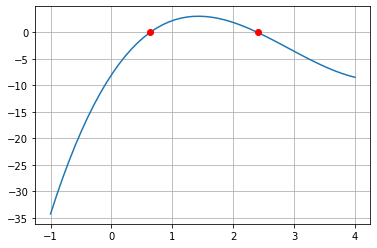

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def biseccion(f,a,b,tol):
    if np.sign(f(a))==np.sign(f(b)):
        raise Exception("No existe raiz en el intervalo")
    
    dx = 1.0
    k = 0 # contador desde 0
    print(' k       a            r           b')
    while dx > tol:
        k += 1
        x = (a+b)/2
        xt = x
        if (f(x)*f(b)) <0:
            a = x
        else:
            b = x
        dx = abs(b-a)
        print('{:2}{:12.6f}{:12.6f}{:12.6f}'.format(k,a,x,b))        
    return x
        
    
f = lambda x:   (x-2)**3 + 16*np.sin(x/3) - 2*x**2

print('Para la primera raiz')
# intervalo inicial 1
a,b = 0, 1
tol = 0.000001
r1 = biseccion(f,a,b,tol)
print('raiz 1 = ',r1) 

print('')
print('Para la segunda raiz')

# intervalo inicial 2
c,d = 2, 3
tol = 0.000001
r2 = biseccion(f,c,d,tol)
print('raiz 2 = ',r2) 

# Grafica de la funcion
vx = np.linspace(-1.,4.,50)
fv = f(vx)
plt.plot(vx,fv)
plt.grid()
# las raices halladas
vr =np.array([0.6335878372192383,2.4040098190307617])
plt.plot(vr,vr*0,'ro')
print('Con el metodo de biseccion, para ambas raices se necesitaron 20 iteraciones')

#PREGUNTA 2

##Mediante integración numérica de la ecuación diferencial

$\frac{dy}{dt} - e^{-t}cos(t) + y = 0 $ ; $y(t_0)=0$

Con el algoritmo del punto medio, determinar el valor $y(t_k=1.0)$ con una precisión $ϵ=0.0001$

$ypm = y_n+h*\frac{f(t_n,y_n)}{2}$

$y_n = y_n+hf(t_{mid},ypm)$

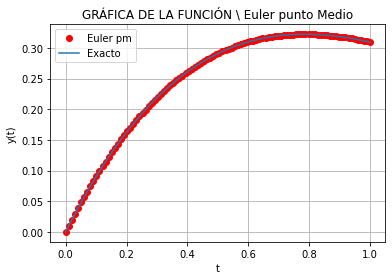

In [8]:
""" 
Solucion con Euler punto medio
"""
import numpy as np 
import matplotlib.pyplot as plt




def Euler_pm(f,t,y0):
  """
  Algoritmo de Euler punto medio
  f: funcion 
  t: vector con los puntos discretos de la variable independiente
  y0 : valor inicial de la funcion y
  """
  y = np.zeros(len(t))  # funcion que se busca y(t) 
  y[0] = 0.0   # asignamos y0 al primer elemento del vector y
  h = t[1]-t[0]
  for n in range(0,len(t)-1):
    ypm = y[n] + h/2*f(t[n],y[n])
    y[n+1] = y[n] + h*f(t[n]+0.5*h,ypm)  # algoritmo de  punto medio
  return y   # devuelve el vector y


t = np.linspace(0,1,100)
y0 = 0.0
f = lambda t,y: np.exp(-t)*np.cos(t)-y
ypm = Euler_pm(f,t,y0)
yex = np.sin(t)/np.exp(t)

#a = 
#np.dsolv
#yex

plt.plot(t,ypm,'ro',label ='Euler pm')
plt.plot(t,yex,label='Exacto')
plt.title('GRÁFICA DE LA FUNCIÓN \ Euler punto Medio')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid()
plt.show()



# Condición inicial
#ics = {y(0): 0}

# Resolviendo la ecuación diferencial
#edo_sol = sympy.dsolve(y(x).diff(x) - f, ics=ics)
#edo_sol

#PARTE 3
##Asumiendo que el enfriamiento de cierto cuerpo se describe mediante la ecuación

$\frac{dT}{dt}= −κ(T − Tm)$

donde $κ$ - caracteriza los mecanismos de transferencia del calor y otros factores, $T_m$ es la temperatura del medio circundante.


$a)$ (2p) Escriba un programa que permita hallar mediante el método de Euler mejorado la variación de la temperatura $T(tk)$ del cuerpo que inicialmente se encuentra a temperatura $T_0$


In [9]:
#### pregunta a)
import numpy as np 
import matplotlib.pyplot as plt

# Euler mejorado

def EulerM(f,t0,tN,T0,Tm,k,h):
  N=int((tN-t0)/ h)
  t=np.linspace(t0, tN, N+1)
  T=np.zeros(N+1)
  T[0]=T0

  f = lambda t,T: -k*(T-Tm)

  for i in range (0, N):
    Tf = T[i] + h/2*f(t[i],T[i])
    T[i+1] = T[i] + 0.5*h*(f(t[i],T[i])+f(t[i+1],Tf))
  return ((t,T))


#### pregunta b)
import pandas as pd
(t,T) = EulerM(f, 0, 1000, 400, 300,0.02, 5)
df = pd.DataFrame()
df["t"]= t
df['T(t)']= T 
df


,t,T(t)
0,0.0,400.000000
1,5.0,390.250000
2,10.0,381.450625
3,15.0,373.509189
4,20.0,366.342043
...,...,...
196,980.0,300.000000
197,985.0,300.000000
198,990.0,300.000000
199,995.0,300.000000


$b)$ Ejecutar el programa con los valores de $κ = 0.02s^{−1}$, $T_0 = 400K$ y la temperatura del medio $T_m = 300 K$. La solucíon hallar hasta que la temperatura disminuya hasta $25 C$. (2p)

In [10]:
#### pregunta b)
import pandas as pd
(t,T) = EulerM(f, 0, 1000, 400, 300,0.02, 5)
df = pd.DataFrame()
df["t"]= t
df['T(t)']= T 
df

,t,T(t)
0,0.0,400.000000
1,5.0,390.250000
2,10.0,381.450625
3,15.0,373.509189
4,20.0,366.342043
...,...,...
196,980.0,300.000000
197,985.0,300.000000
198,990.0,300.000000
199,995.0,300.000000


$c)$ Presentar la representación gráfica de la solución aproximada
y exacta. (2p)

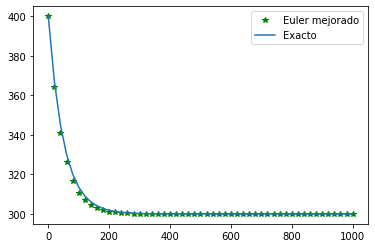

In [11]:
#### pregunta c)
#La solucion aproximada con euler mejorado
(t,T) = EulerM(f, 0, 1000, 400, 300,0.02, 20)
#La solucion exacta:
yex = 300 + 100 * np.exp(-0.02*t)

#graficas
plt.plot(t,T,'g*',label ='Euler mejorado')
plt.plot(t,yex,label='Exacto')
plt.legend(loc='upper right')
plt.show()

$d)$ (1p) Analizar el efecto del paso de discretización $h$ (considerando $h = 0.1$ y $0.001$) y el error local en cada punto de la malla comparando con la solución exacta.

In [12]:
#### pregunta d)
import pandas as pd

#Buscamos los errores
# Para h=0.1
(t1,T1)=EulerM(f, 0, 500, 400, 300,0.02, 0.1)

#La solucion exacta:
q = np.linspace(0, 500, 5001) # q representa el tiempo
yex = 300 + 100 * np.exp(-0.02*q)

#Error:
Err = yex - T1

D = pd.DataFrame()
D["t"] = t1
D["T"] = T1
D["T_ex"] = yex
D["Error"] = Err

print("Para h = 0.1")
D


Para h = 0.1


,t,T,T_ex,Error
0,0.0,400.000000,400.000000,0.000000
1,0.1,399.800100,399.800200,0.000100
2,0.2,399.600600,399.600799,0.000199
3,0.3,399.401498,399.401796,0.000298
4,0.4,399.202794,399.203191,0.000397
...,...,...,...,...
4996,499.6,300.004554,300.004576,0.000023
4997,499.7,300.004545,300.004567,0.000023
4998,499.8,300.004535,300.004558,0.000023
4999,499.9,300.004526,300.004549,0.000023


In [13]:
import pandas as pd

#Buscamos los errores
# Para h=0.001
(t2,T2)=EulerM(f, 0, 500, 400, 300,0.02, 0.001)

#La solucion exacta:
j = np.linspace(0, 500, 500001) # j representa el tiempo
yex1 = 300 + 100 * np.exp(-0.02*j)

#Error:
Err1 = yex1 - T2

E = pd.DataFrame()
E["t"] = t2
E["T"] = T2
E["T_ex"] = yex1
E["Error"] = Err1

print("Para h = 0.001")

E

Para h = 0.001


,t,T,T_ex,Error
0,0.000,400.00000,400.00000,0.000000e+00
1,0.001,399.99800,399.99800,9.999837e-09
2,0.002,399.99600,399.99600,1.999933e-08
3,0.003,399.99400,399.99400,2.999843e-08
4,0.004,399.99200,399.99200,3.999708e-08
...,...,...,...,...
499996,499.996,300.00454,300.00454,2.270109e-07
499997,499.997,300.00454,300.00454,2.270068e-07
499998,499.998,300.00454,300.00454,2.270027e-07
499999,499.999,300.00454,300.00454,2.269987e-07


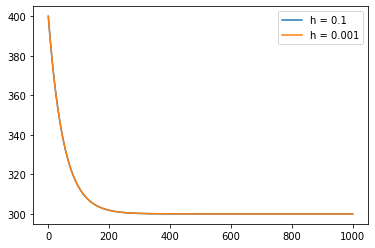

In [ ]:
#Grafica
for h in [0.1,0.001]:
  (t,T)=EulerM(f, 0, 1000, 400, 300,0.02, h)
  plt.plot(t,T, label = "h = " +str(h))
plt.legend()

#PREGUNTA 4

Considere el movimiento vertical de un cuerpo de masa $m$ en campo gravitacional de la tierra asumiendo que la fuerza de resistencia del aire
es proporcional al cuadrado de la velocidad $F_r = kv^2$

a) (1p)Formule el modelo matematico que gobierna el sistema, eligiendo
adecuadamente el sistema de coordenadas (Asumir el eje positivo
de $z$ dirigido hacia arriba.)

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
#Modelo matemático
acel = lambda  v,t : - km*v + g  #segunda derivada y'' (aceleración)
fz = lambda v,t : v 
#Condiciones
#z >= 0

b) (2p)Escriba un programa que simule el movimiento vertical cuando el cuerpo es lanzado hacia arriba desde cierta altura mediante el algoritmo de Verlet en forma de velocidades.

In [3]:
"""
Algoritmo de Verlet en forma de velocidaes
"""
import numpy as np
import matplotlib.pyplot as plt

def verlet_sb(acel,fz,h,t,v,z):
    """
    vt,vv,vz son vectores
    """
    vt =[t]
    vv = [v]
    vz =[z]
    az = [acel(v,t)]
    while z>=0:
        print('{:4.2f}{:8.2f}{:8.2f}{:10.4f}'.format(t,v,z,acel(v,t)))
        z = z + v*h + 0.5*acel(v,t)*h**2   # Verlet
        vtem = v + h*acel(v,t)    # Euler 
        v = v + 0.5*h*(acel(v,t)+acel(vtem,t))
        t = t+h
        vt.append(t)
        vv.append(v)
        vz.append(z)
        az.append(acel(v,t))
    return (vt,vv,vz,az)


c) (2p)Ejecute el programa con los siguientes datos: $z(0) = 10 m
$, $v(0) = 100 m/s$, $m = 0.1 kg$, $dt = 0.1s$, $k = 0.01 Ns2/m2$.
Determine en el instante de $1.2 s$ la altura $z$, velocidad $v$ y la aceleración $a$ teniendo en cuenta la precisión que garantiza el algoritmo.


In [5]:
# condiciones iniciales
t,v,z = 0.,100.,10.0   

print('Solucion de la caida con verlet')

k = 0.01 # 0-caida libre
m = 0.1  # masa en kg
km = k/m
h = 0.1
g = -9.87
print('coeficiente k =', k)
print('Como muestra la tabla, en el instante 1.2 s, la altura es de: 116.25 m, la velocidad es de: 77.53 m/s y la aceleracion es de: 17.6231 m/s^2')
print('  t      v       z       a')

# solucion numerica con verlet
ts,vs,zs,az = verlet_sb(acel,fz,h,t,v,z)

Solucion de la caida con verlet
coeficiente k = 0.01
Como muestra la tabla, en el instante 1.2 s, la altura es de: 116.25 m, la velocidad es de: 77.53 m/s y la aceleracion es de: 17.6231 m/s^2
  t      v       z       a
0.00  100.00   10.00  -19.8700
0.10   98.02   19.90  -19.6723
0.20   96.07   29.60  -19.4766
0.30   94.13   39.11  -19.2828
0.40   92.21   48.43  -19.0909
0.50   90.31   57.56  -18.9009
0.60   88.43   66.49  -18.7129
0.70   86.57   75.24  -18.5267
0.80   84.72   83.81  -18.3423
0.90   82.90   92.19  -18.1598
1.00   81.09  100.39  -17.9791
1.10   79.30  108.40  -17.8003
1.20   77.53  116.25  -17.6231
1.30   75.78  123.91  -17.4478
1.40   74.04  131.40  -17.2742
1.50   72.32  138.72  -17.1023
1.60   70.62  145.87  -16.9321
1.70   68.94  152.84  -16.7637
1.80   67.27  159.65  -16.5969
1.90   65.62  166.30  -16.4317
2.00   63.98  172.78  -16.2682
2.10   62.36  179.09  -16.1064
2.20   60.76  185.25  -15.9461
2.30   59.17  191.25  -15.7874
2.40   57.60  197.08  -15.6304
2.50 

d) (1p) Presente graficamente los datos obtenidos $z(t_k)$, $v(t_k)$, $a(t_k)$

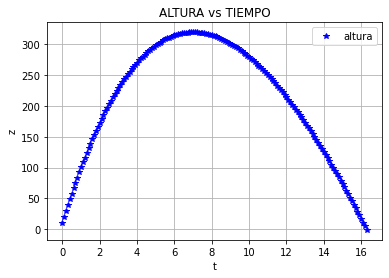

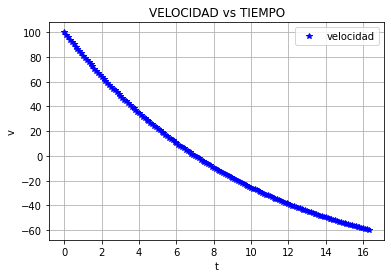

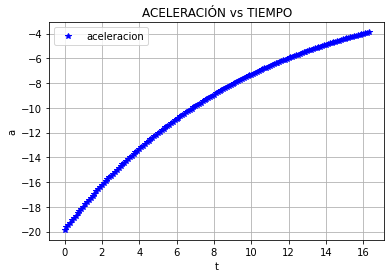

In [19]:
# graficas
plt.title("ALTURA vs TIEMPO")
plt.plot(ts,zs,'b*',label ='altura')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('z')
plt.grid()
plt.figure(2)

plt.title("VELOCIDAD vs TIEMPO")
plt.plot(ts,vs,'b*',label ='velocidad')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('v')
plt.grid()
plt.figure(3)

plt.title("ACELERACIÓN vs TIEMPO")
plt.plot(ts,az,'b*',label ='aceleracion')
plt.legend(loc='best')
#plt.plot(x, y, "b:")
plt.xlabel('t')
plt.ylabel('a')
plt.grid()